In [53]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv(r"C:\Users\dhrit\Downloads\heart.csv")
print("✅ Dataset loaded")
print(data.head())

✅ Dataset loaded
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [55]:
for col in ['age','trestbps','chol','thalach','oldpeak']:
    data[col] = pd.cut(data[col], bins=3, labels=[0,1,2])
data = data.astype(int)

In [56]:
edges = [('age', 'target'), ('cp', 'target'), ('chol', 'target'), ('thalach','target')]

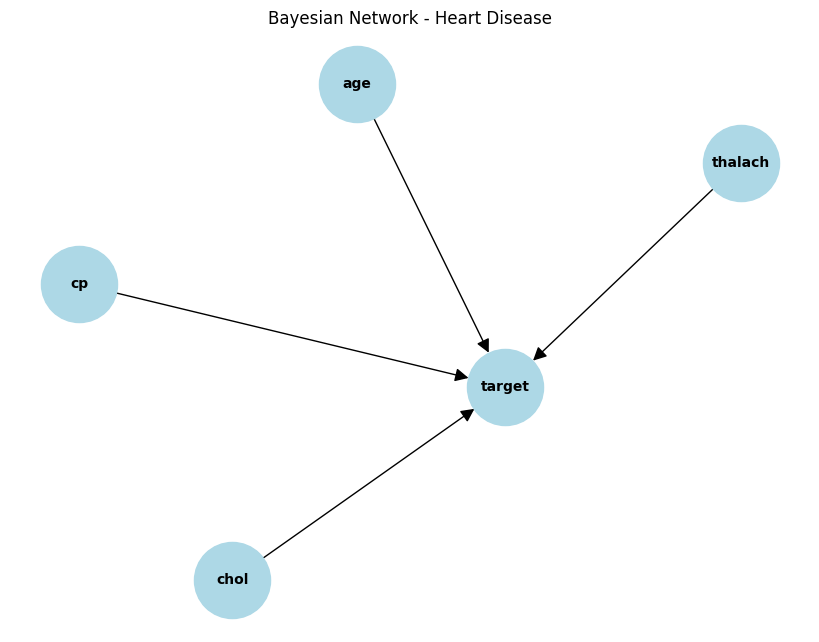

In [57]:
G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', arrowsize=20, font_size=10, font_weight='bold')
plt.title("Bayesian Network - Heart Disease")
plt.show()

In [58]:
cpt = data.groupby(['cp','age','target']).size().reset_index(name='count')
cpt['prob'] = cpt.groupby(['cp','age'])['count'].transform(lambda x: x/x.sum())
print("\n✅ Conditional Probability Table (sample):")
print(cpt.head(10))



✅ Conditional Probability Table (sample):
   cp  age  target  count      prob
0   0    0       0     50  0.641026
1   0    0       1     28  0.358974
2   0    1       0    228  0.788927
3   0    1       1     61  0.211073
4   0    2       0     97  0.746154
5   0    2       1     33  0.253846
6   1    0       1     54  1.000000
7   1    1       0     26  0.285714
8   1    1       1     65  0.714286
9   1    2       0      7  0.318182


In [59]:
subset = cpt[(cpt['cp']==2) & (cpt['age']==1) & (cpt['target']==1)]
if len(subset) > 0:
    prob_target1 = subset['prob'].values[0]
else:
    prob_target1 = 0
print(f"\n🔮 Inference: P(target=1 | cp=2, age=1) = {prob_target1:.2f}")



🔮 Inference: P(target=1 | cp=2, age=1) = 0.74


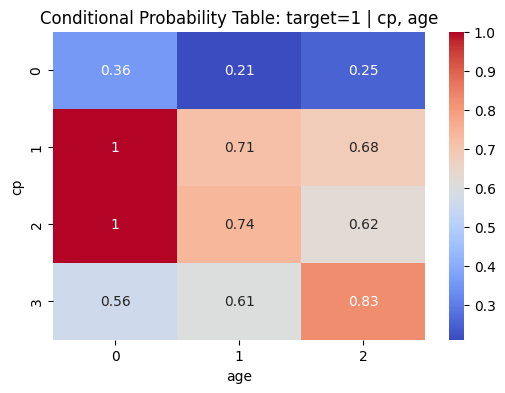

In [60]:
cpt_pivot = cpt[cpt['target']==1].pivot(index='cp', columns='age', values='prob')
plt.figure(figsize=(6,4))
sns.heatmap(cpt_pivot, annot=True, cmap='coolwarm')
plt.title("Conditional Probability Table: target=1 | cp, age")
plt.show()